In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

rent_path = "../Resources/Rent of Primary Residence in U.S. City Average.csv"
rent_df = pd.read_csv(rent_path)

home_purchases_path = "../Resources/Housing from Age 25-34.csv"
home_purchases_df = pd.read_csv(home_purchases_path)

In [102]:
rent_df

,DATE,CUSR0000SEHA
0,9/1/2017,310.346
1,10/1/2017,311.330
2,11/1/2017,312.295
3,12/1/2017,313.462
4,1/1/2018,314.500
5,2/1/2018,315.142
6,3/1/2018,315.904
7,4/1/2018,316.955
8,5/1/2018,317.803
9,6/1/2018,318.634


In [103]:
home_purchases_df

,DATE,CXUHOUSINGLB0403M
0,2016-01-01,18587
1,2017-01-01,19927
2,2018-01-01,19627
3,2019-01-01,20499
4,2020-01-01,21223
5,2021-01-01,22641


In [104]:
clean_home_purchases= home_purchases_df.drop([0,0])
clean_home_purchases

,DATE,CXUHOUSINGLB0403M
1,2017-01-01,19927
2,2018-01-01,19627
3,2019-01-01,20499
4,2020-01-01,21223
5,2021-01-01,22641


In [137]:
clean_home_purchases["DATE"] = pd.to_datetime(clean_home_purchases["DATE"])

In [138]:
renamed_home_purchases = clean_home_purchases.rename(columns={"DATE":"Date", "CXUHOUSINGLB0403M": "# of 24-35 Yr. Old Buying Homes"})
renamed_home_purchases.head()

,Date,# of 24-35 Yr. Old Buying Homes,Year
1,2017-01-01,19927,2017
2,2018-01-01,19627,2018
3,2019-01-01,20499,2019
4,2020-01-01,21223,2020
5,2021-01-01,22641,2021


In [140]:
renamed_home_purchases['Year']= renamed_home_purchases['Date'].dt.year
renamed_home_purchases

,Date,# of 24-35 Yr. Old Buying Homes,Year
1,2017-01-01,19927,2017
2,2018-01-01,19627,2018
3,2019-01-01,20499,2019
4,2020-01-01,21223,2020
5,2021-01-01,22641,2021


In [142]:
grouped_home_purchases = renamed_home_purchases.groupby(["Year"])
sum_home = grouped_home_purchases.sum()
sum_home.head()

,# of 24-35 Yr. Old Buying Homes
Year,
2017,19927
2018,19627
2019,20499
2020,21223
2021,22641


In [143]:
rent_df["DATE"] = pd.to_datetime(rent_df["DATE"])

In [144]:
renamed_rent_df = rent_df.rename(columns={"DATE":"Date", "CUSR0000SEHA": "Cost of Rent ($)"})
renamed_rent_df.head()

,Date,Cost of Rent ($)
0,2017-09-01,310.346
1,2017-10-01,311.330
2,2017-11-01,312.295
3,2017-12-01,313.462
4,2018-01-01,314.500


In [145]:
renamed_rent_df['Year']= renamed_rent_df['Date'].dt.year
renamed_rent_df

,Date,Cost of Rent ($),Year
0,2017-09-01,310.346,2017
1,2017-10-01,311.330,2017
2,2017-11-01,312.295,2017
3,2017-12-01,313.462,2017
4,2018-01-01,314.500,2018
5,2018-02-01,315.142,2018
6,2018-03-01,315.904,2018
7,2018-04-01,316.955,2018
8,2018-05-01,317.803,2018
9,2018-06-01,318.634,2018


In [146]:
grouped_rent = renamed_rent_df.groupby(["Year"])
print(grouped_rent)

mean_rent = grouped_rent.mean()
mean_rent

,Cost of Rent ($)
Year,
2017,311.858250
2018,319.291500
2019,331.125917
2020,341.470167
2021,349.134833


In [147]:
combined_data = pd.merge(mean_rent, sum_home, on="Year")
combined_data.head()

,Cost of Rent ($),# of 24-35 Yr. Old Buying Homes
Year,,
2017,311.858250,19927
2018,319.291500,19627
2019,331.125917,20499
2020,341.470167,21223
2021,349.134833,22641


Text(0, 0.5, 'Cost of Rent ($)')

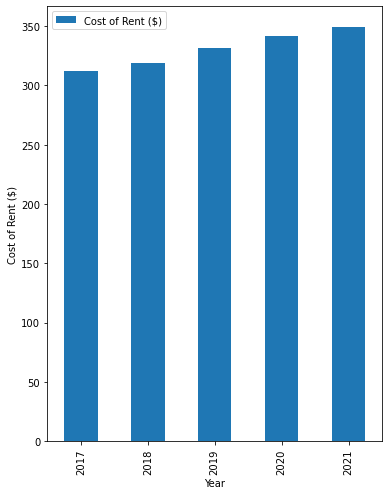

In [154]:
rent_bar_chart = mean_rent.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
rent_bar_chart.set_xlabel("Year")
rent_bar_chart.set_ylabel("Cost of Rent ($)")

In [158]:
plt.savefig("../Images/CostOfRent.png")

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, '# of 24-35 Yr. Old Buying Homes')

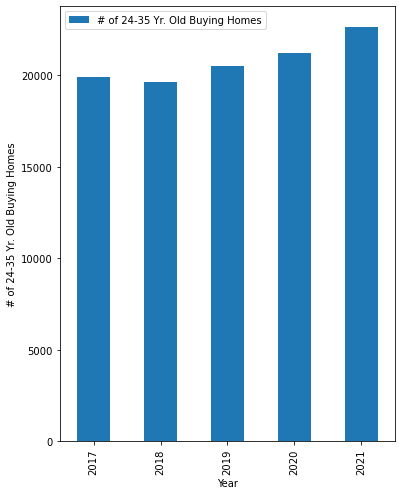

In [157]:
home_bar_chart = sum_home.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
home_bar_chart.set_xlabel("Year")
home_bar_chart.set_ylabel("# of 24-35 Yr. Old Buying Homes")

In [159]:
plt.savefig("../Images/HomePurchases_Rilee.png")

<Figure size 432x288 with 0 Axes>